* Check Diffusivity of the CTD casts.

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import datetime

from salishsea_tools import tidetools, viz_tools,geo_tools
import seaborn as sns
%matplotlib inline

/ocean/jieliu/Anaconda/envs/mpython2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/ocean/jieliu/Anaconda/envs/mpython2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})

In [3]:
paths = {'RFdaily': '/data/jieliu/MEOPAR/IOS/octRFdaily/',
         '1e-05': '/data/jieliu/MEOPAR/IOS/oct1e05/',
          '1e-051e-06':'/data/jieliu/MEOPAR/IOS/oct1e061e05/'}
grid_B = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_10reduceviscosity/mesh_mask.nc')

X = grid_B.variables['nav_lon']
Y = grid_B.variables['nav_lat']

In [41]:
S={}
RF_T = nc.Dataset('/data/jieliu/MEOPAR/IOS/octRFdaily/SalishSea_1d_20141001_20141030_grid_T.nc')
Di_T = nc.Dataset('/data/jieliu/MEOPAR/IOS/oct1e061e05/SalishSea_1d_20141001_20141030_grid_T.nc')
Vi_T = nc.Dataset('/data/jieliu/MEOPAR/IOS/oct1e05/SalishSea_1d_20141001_20141030_grid_T.nc')
S['RF'] = RF_T.variables['vosaline']
S['Di'] = Di_T.variables['vosaline']
S['Vi'] = Vi_T.variables['vosaline']
depth = Di_T.variables['deptht']

# Plot

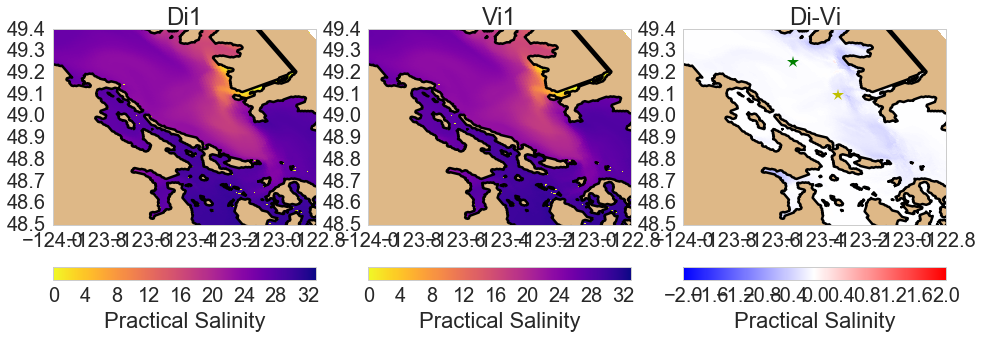

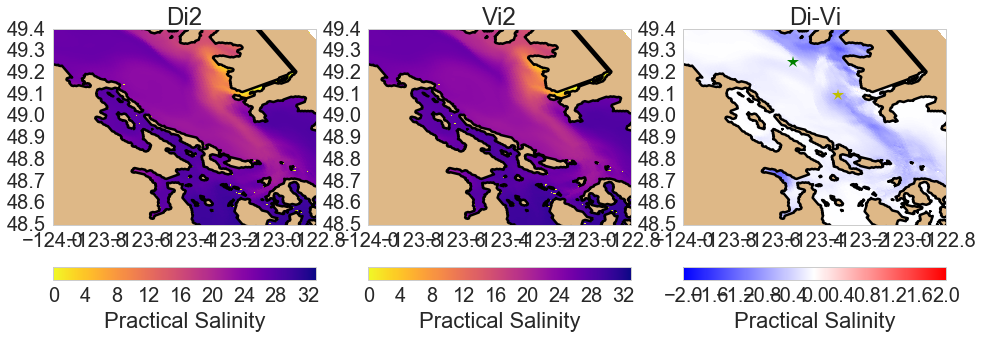

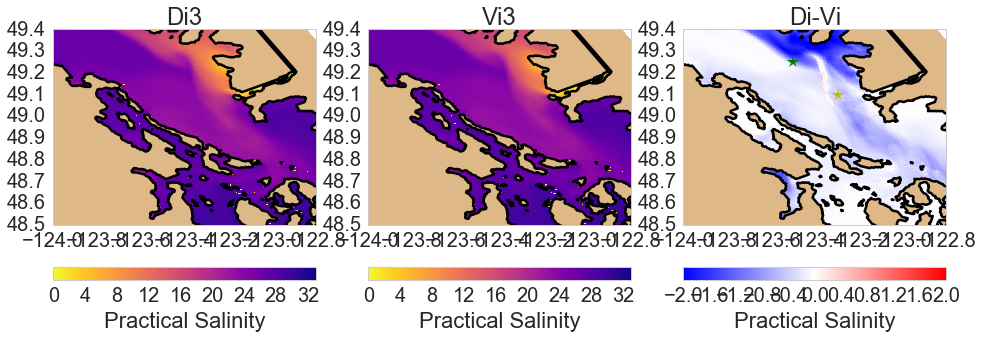

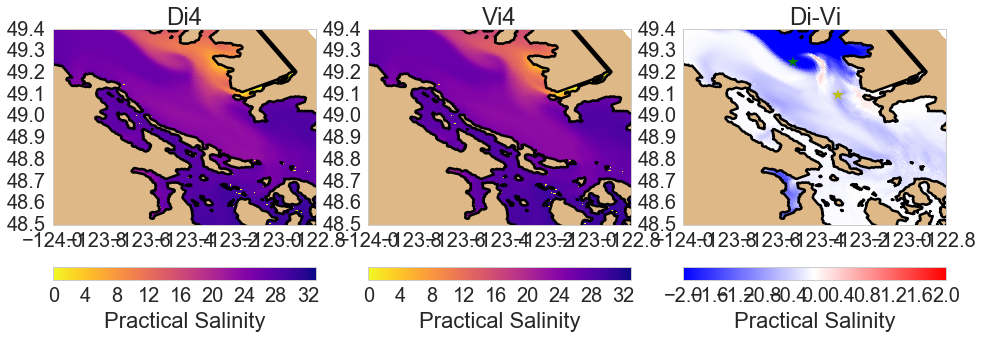

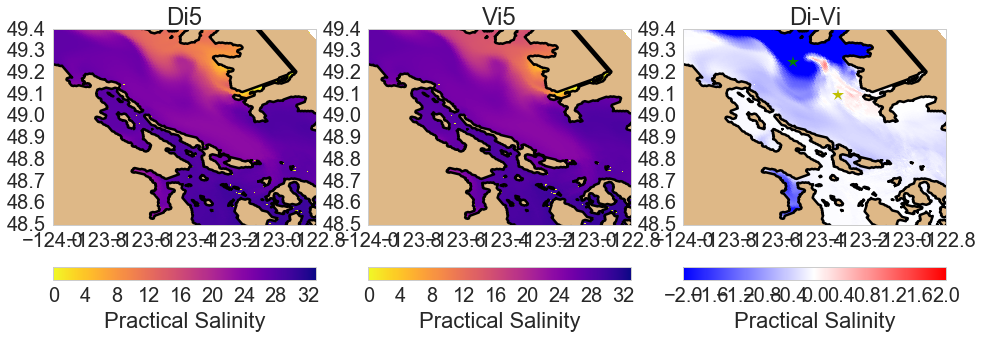

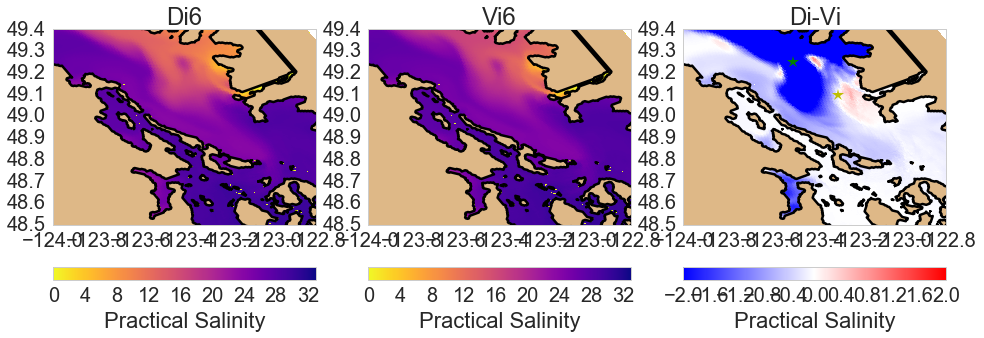

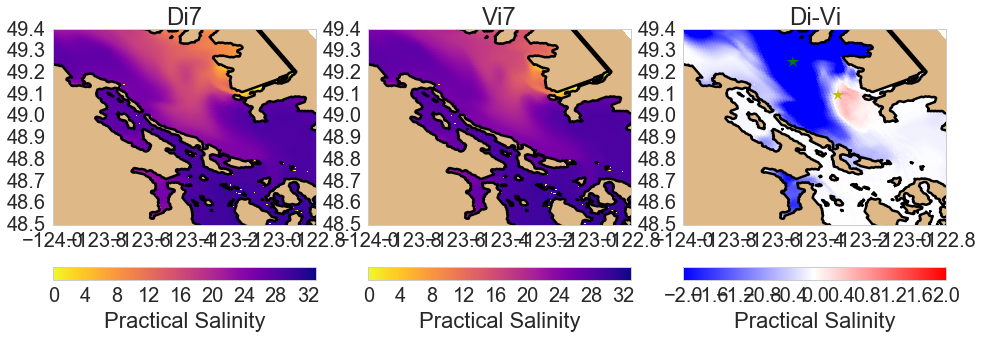

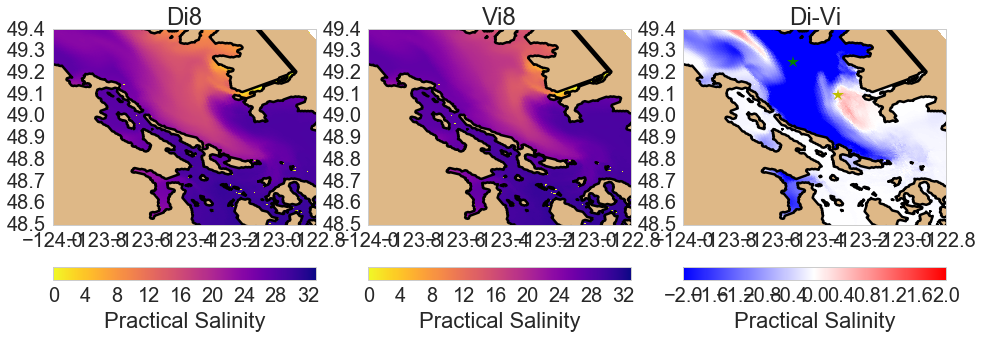

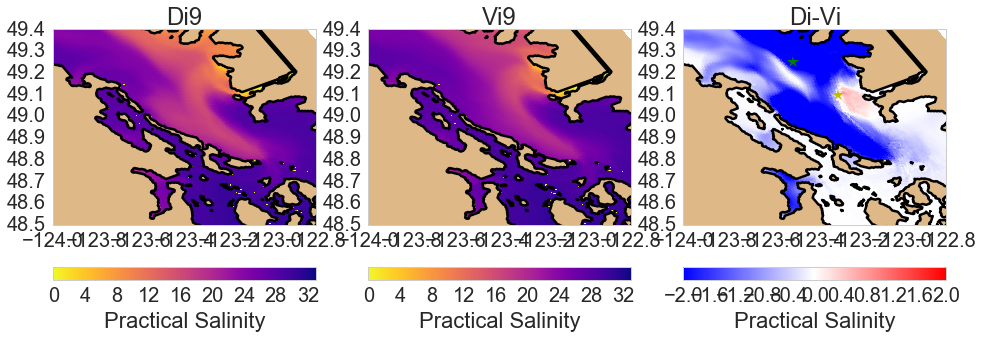

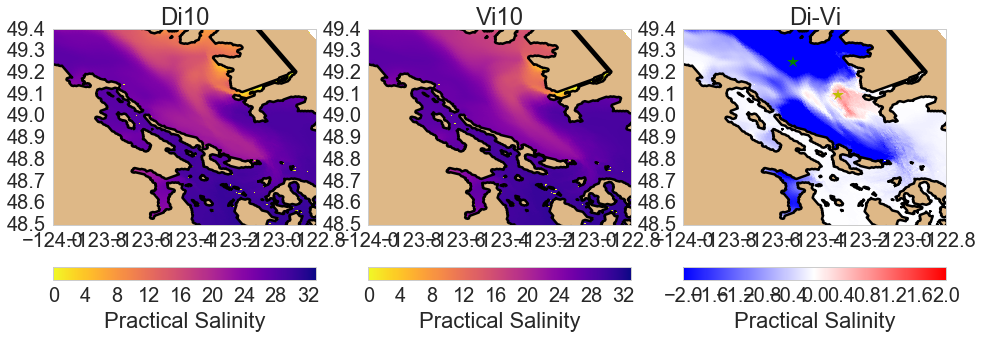

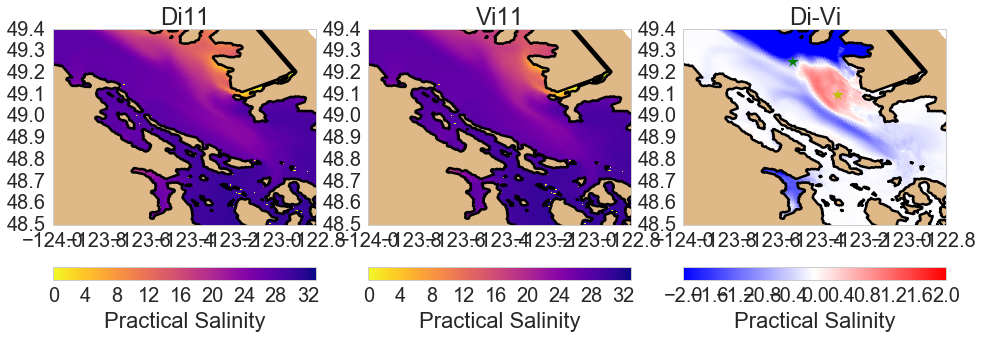

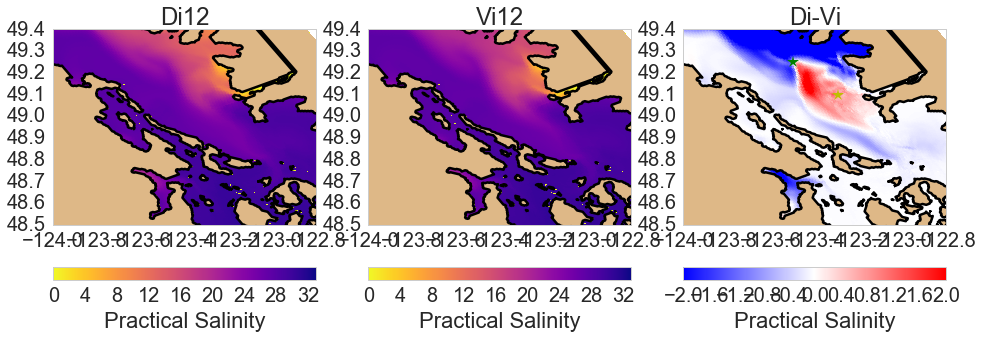

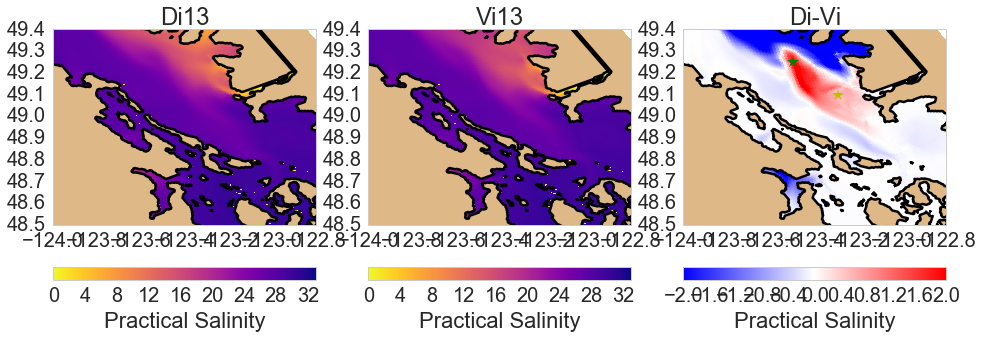

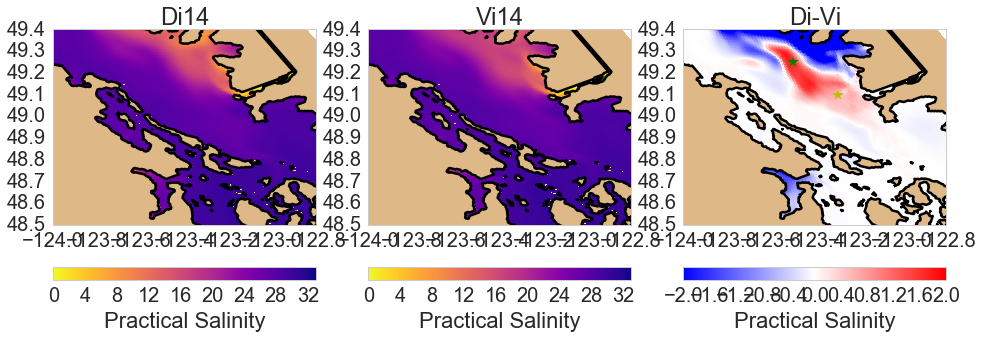

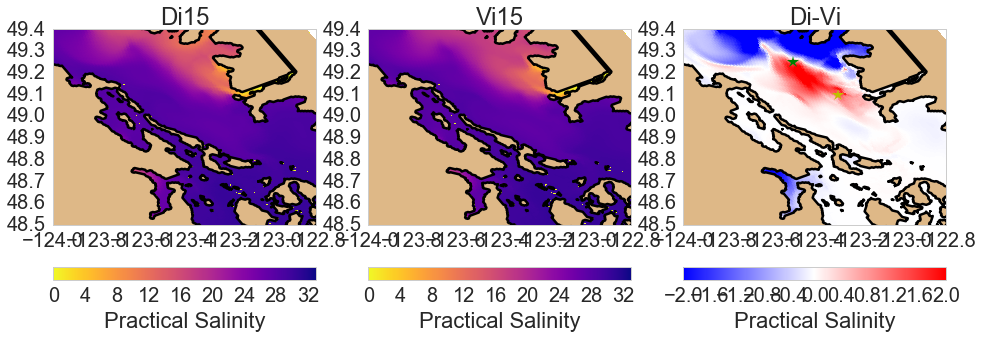

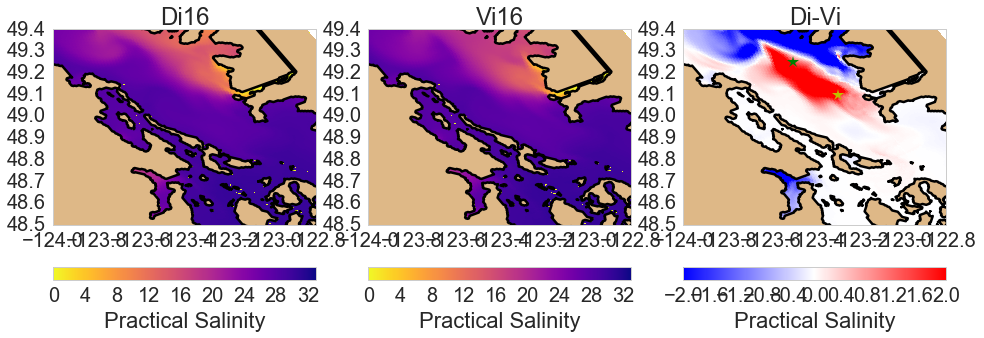

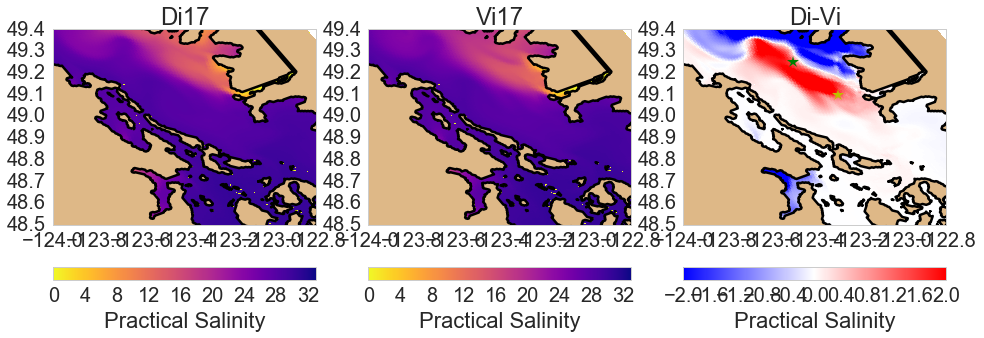

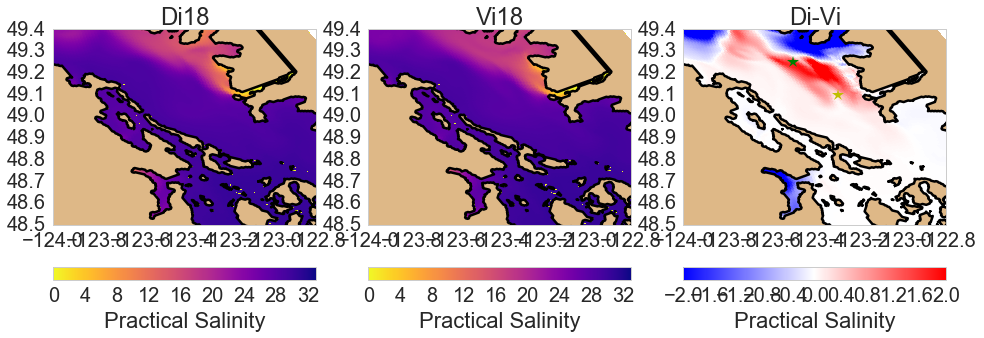

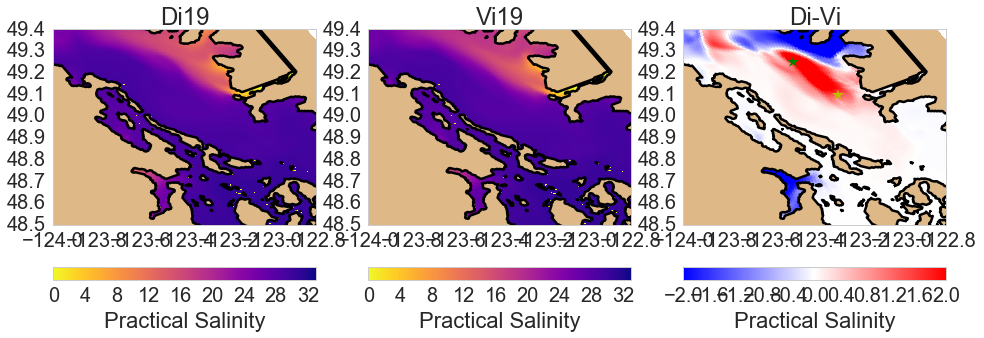

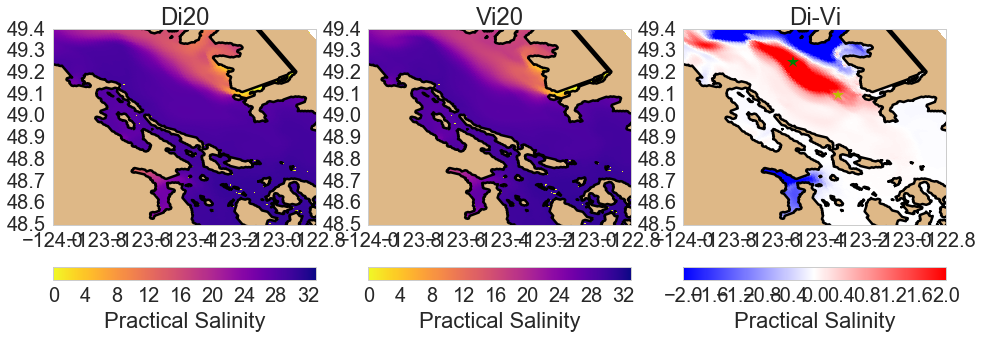

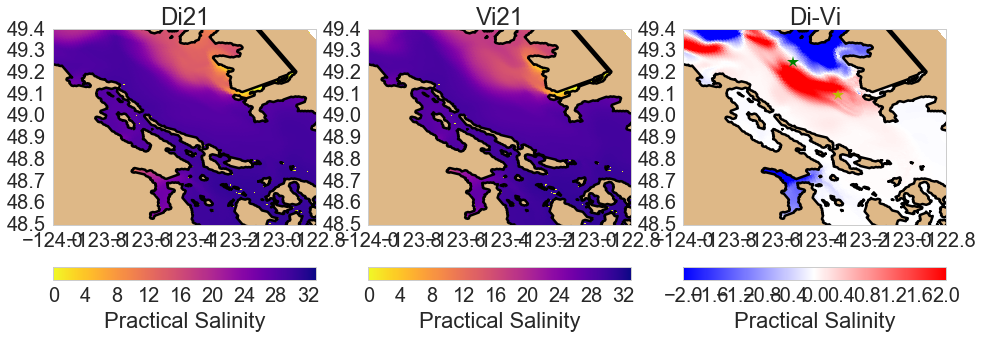

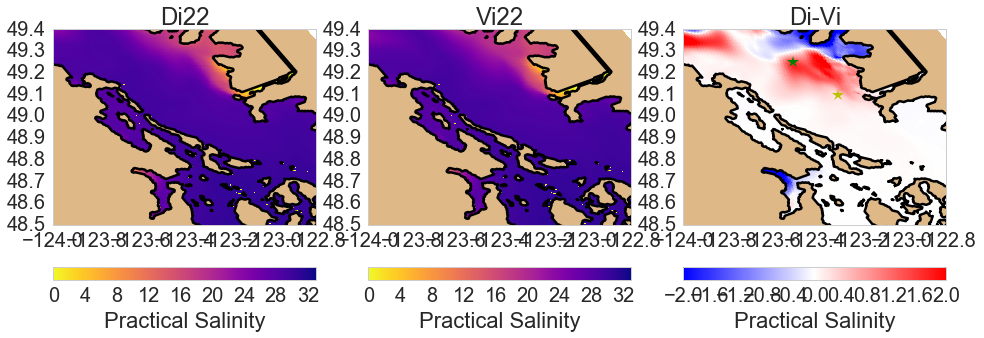

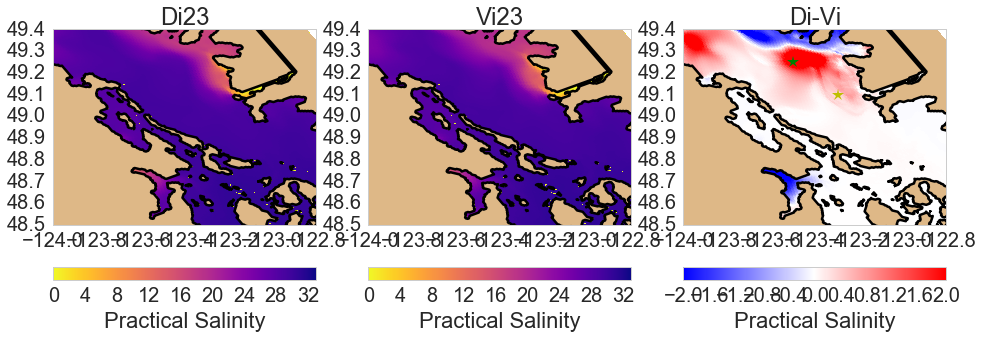

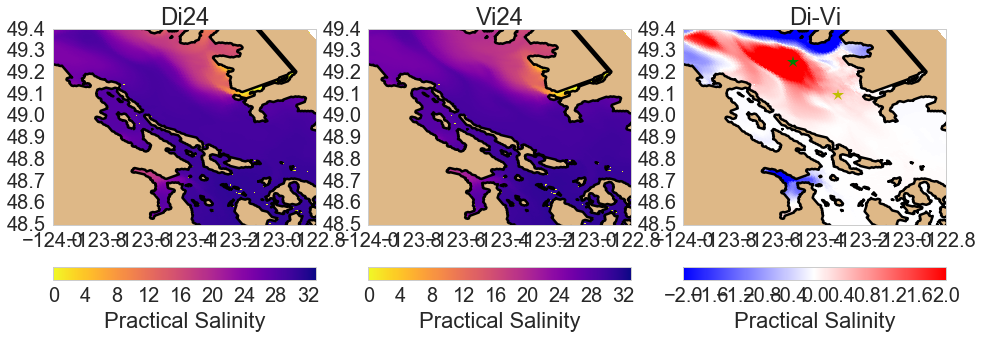

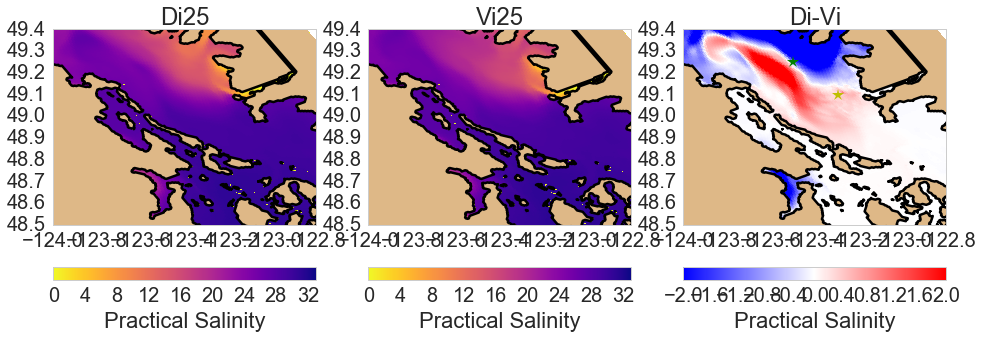

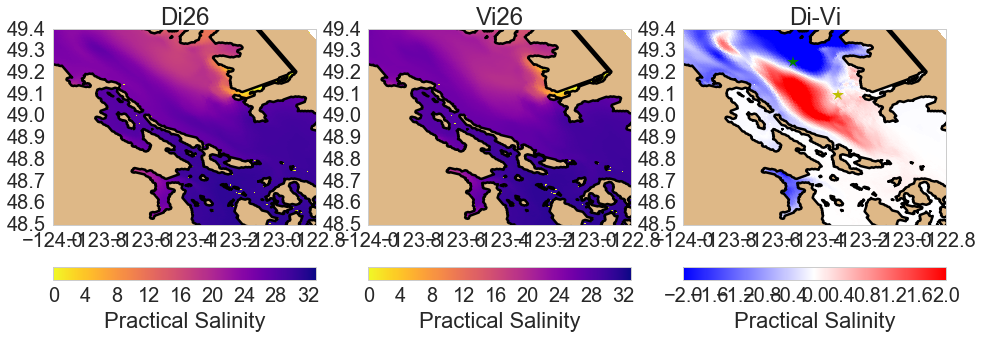

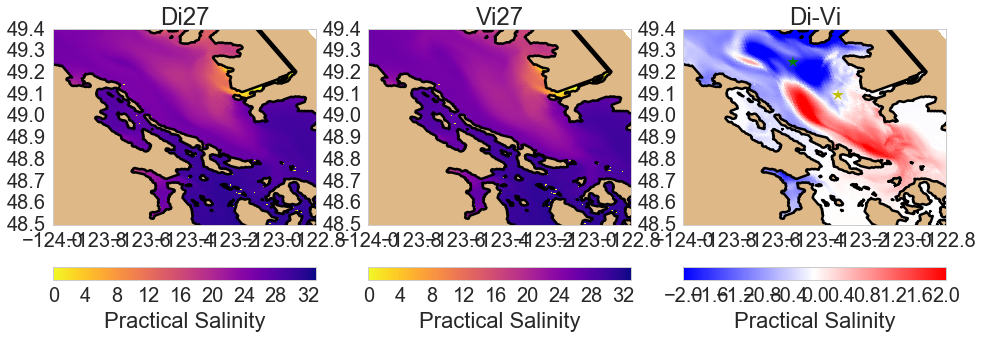

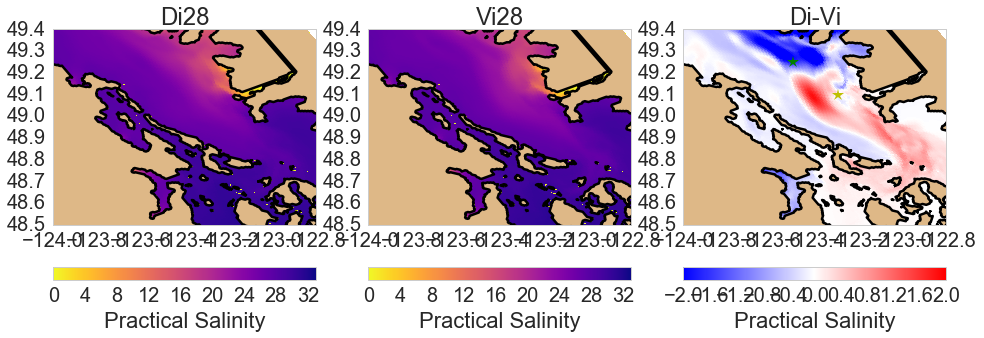

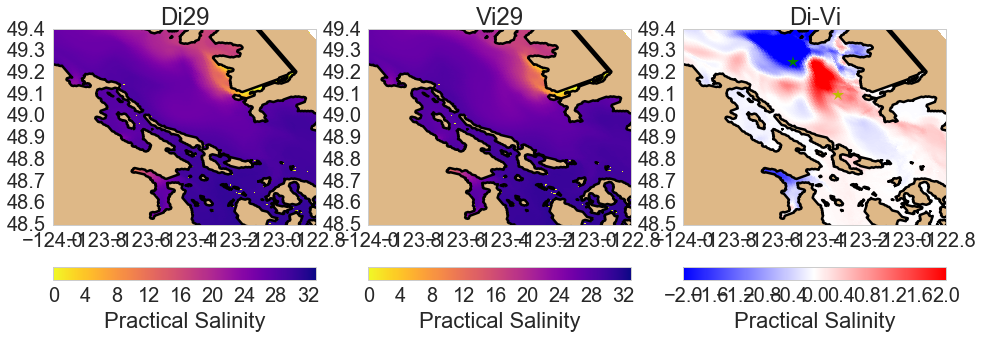

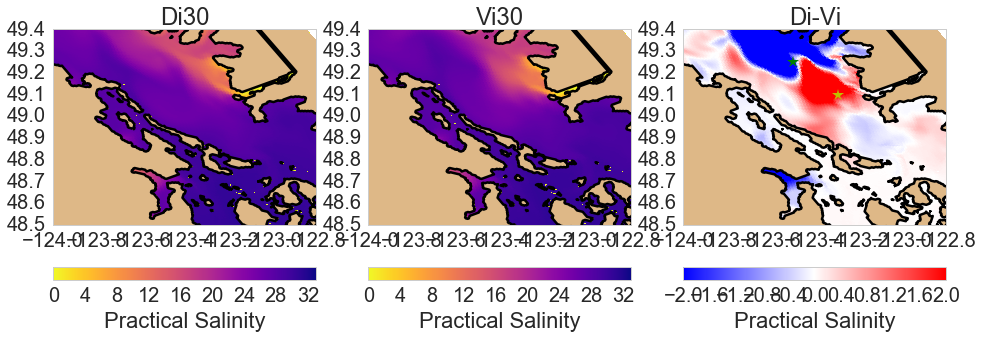

In [36]:
dep = 0
for day in range(30):
    fig,axs = plt.subplots(1,3,figsize = (16,5))
    for ax, key in zip([axs[0],axs[1]],['Di','Vi']):
        mesh = ax.pcolormesh(X,Y,S[key][day,dep],label = key,cmap = 'plasma_r',vmin =0,vmax = 33)
        viz_tools.plot_coastline(ax,grid_B, coords='map')
        viz_tools.plot_land_mask(ax,grid_B,coords='map',color='burlywood')
        cbar = fig.colorbar(mesh,ax = ax,orientation = 'horizontal')
        cbar.set_label('Practical Salinity')
        ax.set_title(key+str(day+1))
        ax.set_xlim([-124, -122.8])
        ax.set_ylim([48.5, 49.4]) 

    ax = axs[-1]
    mesh = ax.pcolormesh(X,Y,S['Di'][day,dep]-S['Vi'][day,dep],label = key,cmap = 'bwr',vmin =-2,vmax = 2)
    ax.plot(X[426,293],Y[426,293],'y*',markersize = 12)
    ax.plot(X[470,282],Y[470,282],'g*',markersize = 12)
    viz_tools.plot_coastline(ax,grid_B, coords='map')
    viz_tools.plot_land_mask(ax,grid_B,coords='map',color='burlywood')
    cbar = fig.colorbar(mesh,ax = ax,orientation = 'horizontal')
    cbar.set_label('Practical Salinity')
    ax.set_title('Di-Vi')
    ax.set_xlim([-124, -122.8])
    ax.set_ylim([48.5, 49.4])  

# Vertical profiles

(48.5, 49.4)

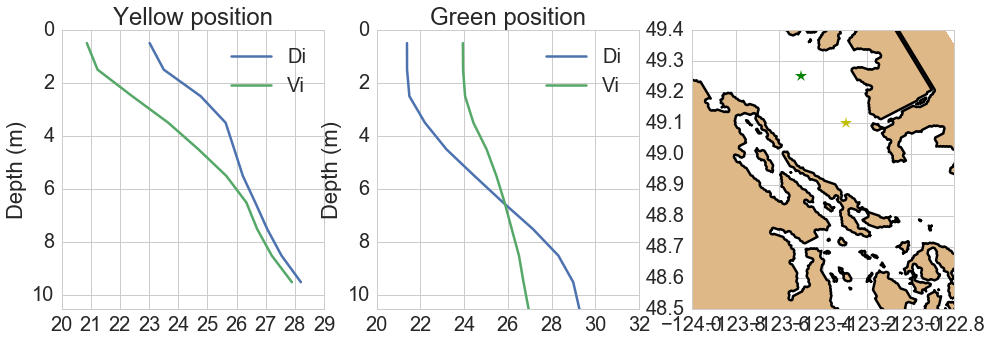

In [44]:
fig, axs = plt.subplots(1,3,figsize = (16,5))
ax = axs[0]
for key in ['Di','Vi']:
    ax.plot(S[key][-1,0:10,426,293],depth[0:10],label = key)
    ax.legend(loc = 'best')
    ax.set_title('Yellow position')
ax = axs[1]
for key in ['Di','Vi']:
    ax.plot(S[key][-1,0:30,470,282],depth[0:30],label = key)
    ax.legend(loc = 'best')
    ax.set_title('Green position')
for ax in [axs[0],axs[1]]:
    ax.set_ylim([depth[10],0])
    ax.set_ylabel('Depth (m)')
ax = axs[2]
viz_tools.plot_coastline(ax,grid_B, coords='map')
viz_tools.plot_land_mask(ax,grid_B,coords='map',color='burlywood')
ax.plot(X[426,293],Y[426,293],'y*',markersize = 12)
ax.plot(X[470,282],Y[470,282],'g*',markersize = 12)
ax.set_xlim([-124, -122.8])
ax.set_ylim([48.5, 49.4]) 

# Background values vs GLS

In [45]:
gridW_1e05 = nc.Dataset('/data/jieliu/MEOPAR/IOS/oct1e05/SalishSea_1d_20141001_20141030_grid_W.nc')
gridW_1e0605 = nc.Dataset('/data/jieliu/MEOPAR/IOS/oct1e061e05/SalishSea_1d_20141001_20141030_grid_W.nc')

In [87]:
## say, at Sandheads
j = 424; i =266
DIFF ={}; DEPTHW = {}
keys = ['High','Low']
for key, gridW in zip(keys,[gridW_1e05,gridW_1e0605]):
    DIFF[key] = gridW.variables['ve_eddy_diff'][:,:,j,i]
    DEPTHW[key] = gridW.variables['depthw']

In [92]:
colors = ['y','g']
bg = {'High': 1e-5,'Low':1e-6}
xmin = -7
xmax = -2
zmin = 0
zmax =200
t1 = 25
t2 = 30

(200, 0)

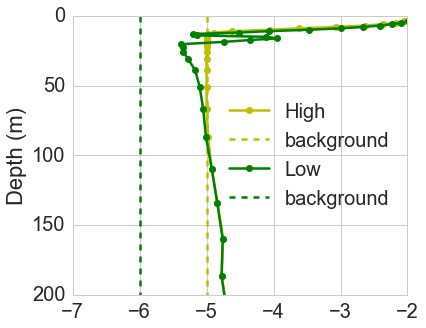

In [93]:
fig, ax = plt.subplots(1,1,figsize = (6,5))
for key,c in zip(keys,colors):
    ax.plot(np.log10(np.nanmean(np.ma.masked_values(DIFF[key][t1:t2],0),axis = 0)),DEPTHW[key],'-o',label=key,color=c)
    ax.plot(np.log10([bg[key], bg[key]]), [DEPTHW[key][0], DEPTHW[key][-1]],\
                '--', color=c, label='background')
ax.legend(loc=0)
ax.set_ylabel('Depth (m)')
ax.set_xlim([xmin, xmax])
ax.set_ylim([zmax,zmin])

In [31]:
BATHY,X,Y = tidetools.get_SS2_bathy_data()
geo_tools.find_closest_model_point(-123.372667,49.054667,X,Y,land_mask=BATHY.mask)

(423, 276)

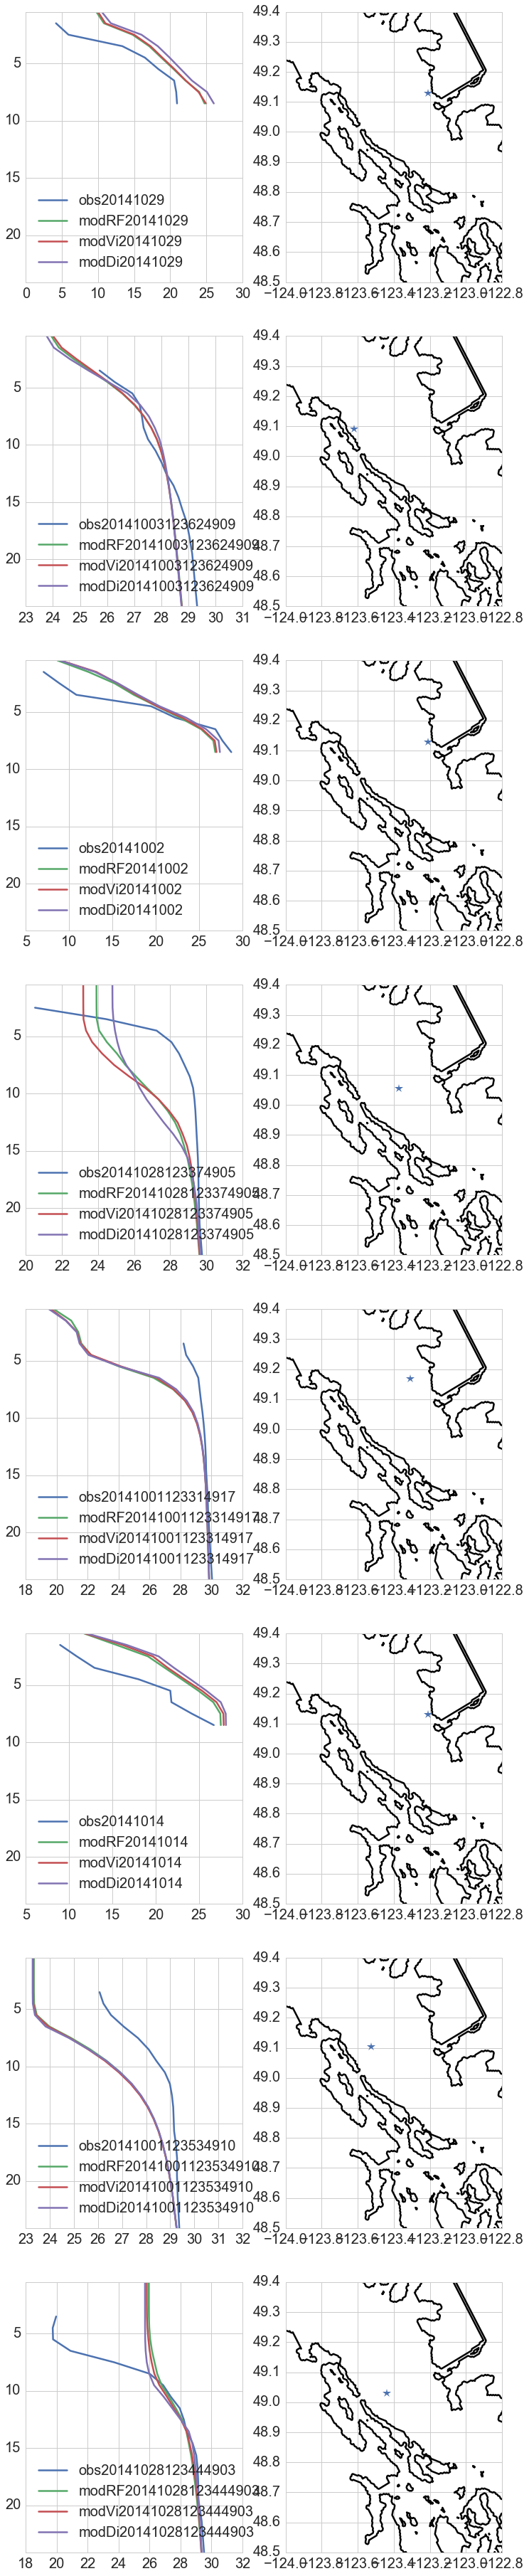

In [32]:
fig, axs = plt.subplots(8,2,figsize = (12,64))
for i,num in zip(obs_values.keys(),np.arange(8)):
    ax = axs[num,0]
    ax.plot(obs_values[i],dep,label = 'obs'+str(i))
    ax.plot(mod_values[i],dep,label = 'modRF'+str(i))
    ax.plot(mod_values_vi[i],dep,label = 'modVi'+str(i))
    ax.plot(mod_values_di[i],dep,label = 'modDi'+str(i))
    ax.set_ylim([dep[20],dep[0]])
    ax.legend(loc = 'best')
    
    ax = axs[num,1]
    if i == 20141002 or i ==20141014 or i ==20141029:
        ax.plot(-123.2119,49.1292,'*',markersize = 12)
    else:
        ax.plot(data_m[data_m['ID'] == str(i)].Longitude.values, \
           data_m[data_m['ID'] == str(i)].Latitude.values,'*',markersize = 12)
    viz_tools.plot_coastline(ax,grid_B, coords='map')
    ax.set_xlim([-124, -122.8])
    ax.set_ylim([48.5, 49.4])   

* Lower diffusivity case does not make surface salinity fresher, why?? Intermediate fresher in one of it.

/data/jieliu/MEOPAR/IOS/octRFdaily/1h_Plume1_T.nc
Too fresh at depth 3.50003051758, -123.527, 49.1026666667, 2014-10-01 00:00:00
/data/jieliu/MEOPAR/IOS/octRFdaily/1h_Plume2_T.nc
Too fresh at depth 3.50003051758, -123.310333333, 49.1673333333, 2014-10-01 00:00:00
/data/jieliu/MEOPAR/IOS/octRFdaily/1h_Plume6_T.nc
Salinity within 1 at depth 3.50003051758, -123.62, 49.0896666667, 2014-10-03 00:00:00
/data/jieliu/MEOPAR/IOS/octRFdaily/1h_Plume11_T.nc
Too salty at depth 3.50003051758, -123.4385, 49.03, 2014-10-28 00:00:00
/data/jieliu/MEOPAR/IOS/octRFdaily/1h_Plume12_T.nc
Too salty at depth 2.50001144409, -123.372666667, 49.0546666667, 2014-10-28 00:00:00
/data/jieliu/MEOPAR/IOS/octRFdaily/1h_Plume40_T.nc
Salinity within 1 at depth 1.50000309944, -123.2119, 49.1292, 2014-10-02 00:00:00
/data/jieliu/MEOPAR/IOS/octRFdaily/1h_Plume40_T.nc
Too salty at depth 1.50000309944, -123.2119, 49.1292, 2014-10-14 00:00:00
/data/jieliu/MEOPAR/IOS/octRFdaily/1h_Plume40_T.nc
Too salty at depth 1.50000309944

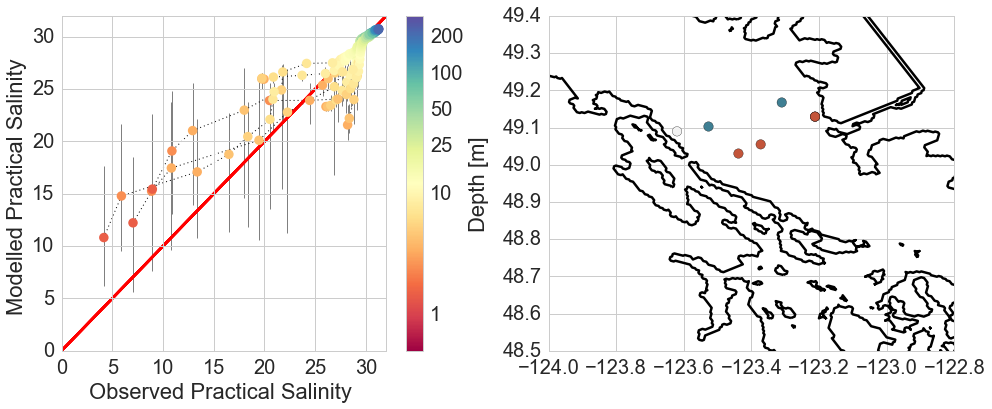

In [31]:
month = 10
lon_min=-123.622
lon_max=-123.2
lat_min=49.
lat_max=49.19
fig1,ax1 = compare_region(data_fall, month,lon_min, lon_max, lat_min, lat_max, paths['RFdaily'],'')

/data/jieliu/MEOPAR/IOS/oct1e05/1h_Plume1_T.nc
Too fresh at depth 3.50003051758, -123.527, 49.1026666667, 2014-10-01 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e05/1h_Plume2_T.nc
Too fresh at depth 3.50003051758, -123.310333333, 49.1673333333, 2014-10-01 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e05/1h_Plume6_T.nc
Salinity within 1 at depth 3.50003051758, -123.62, 49.0896666667, 2014-10-03 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e05/1h_Plume11_T.nc
Too salty at depth 3.50003051758, -123.4385, 49.03, 2014-10-28 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e05/1h_Plume12_T.nc
Salinity within 1 at depth 2.50001144409, -123.372666667, 49.0546666667, 2014-10-28 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e05/1h_Plume40_T.nc
Salinity within 1 at depth 1.50000309944, -123.2119, 49.1292, 2014-10-02 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e05/1h_Plume40_T.nc
Too salty at depth 1.50000309944, -123.2119, 49.1292, 2014-10-14 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e05/1h_Plume40_T.nc
Too salty at depth 1.50000309944, -123.2119, 49.

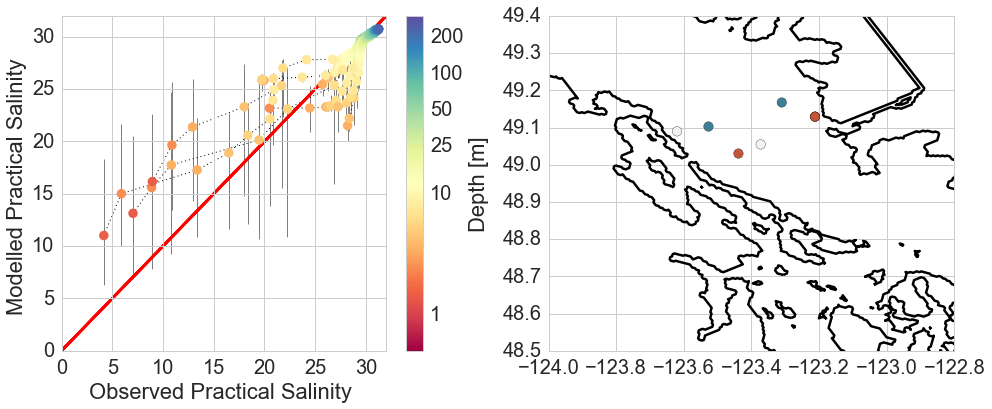

In [32]:
fig1,ax1 = compare_region(data_fall, month,lon_min, lon_max, lat_min, lat_max, paths['1e-05'],'')

/data/jieliu/MEOPAR/IOS/oct1e061e05/1h_Plume1_T.nc
Too fresh at depth 3.50003051758, -123.527, 49.1026666667, 2014-10-01 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e061e05/1h_Plume2_T.nc
Too fresh at depth 3.50003051758, -123.310333333, 49.1673333333, 2014-10-01 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e061e05/1h_Plume6_T.nc
Salinity within 1 at depth 3.50003051758, -123.62, 49.0896666667, 2014-10-03 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e061e05/1h_Plume11_T.nc
Too salty at depth 3.50003051758, -123.4385, 49.03, 2014-10-28 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e061e05/1h_Plume12_T.nc
Too salty at depth 2.50001144409, -123.372666667, 49.0546666667, 2014-10-28 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e061e05/1h_Plume40_T.nc
Salinity within 1 at depth 1.50000309944, -123.2119, 49.1292, 2014-10-02 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e061e05/1h_Plume40_T.nc
Too salty at depth 1.50000309944, -123.2119, 49.1292, 2014-10-14 00:00:00
/data/jieliu/MEOPAR/IOS/oct1e061e05/1h_Plume40_T.nc
Too salty at depth 1.500

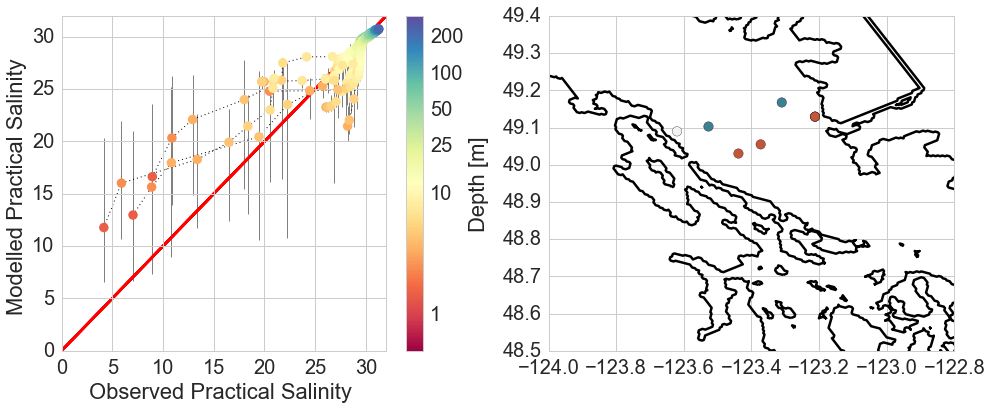

In [33]:
fig1,ax1 = compare_region(data_fall, month,lon_min, lon_max, lat_min, lat_max, paths['1e-051e-06'],'')